In [1]:
reset()
%display latex

# Binárias Compactas no regime pós Newtoniano

Os cálculos realizados neste notebook seguem os passos presentes no cap. 4.1.2 do livro [Gravitational-Wave Physics and Astronomy](https://www.amazon.com.br/Gravitational-Wave-Physics-Astronomy-Introduction-Experiment-ebook/dp/B07M5MMYKN).

In [2]:
var('c G m m1 m2 M mu eta t r R iota varphi')
# c - veloc. da luz
# G - const. gravitacional
# m1 - massa do corpo 1
# m2 - massa do corpo 2
# M = m1 + m2 - massa total do sist.
# mu = m1*m2/M - massa reduzida
# eta = mu/M - razão de massa simétrica
# r = |x - y| - distância binaŕia-Terra
# R = raio orbital - l0
# t - tempo
# iota - ângulo normal à orbita
# varphi - parâmetro da fase orbital

(c, G, m, m1, m2, M, mu, eta, t, r, R, iota, varphi)

In [3]:
msol = var('msol', latex_name = r'M_\odot') # massa do sol
dm = var('dm', latex_name=r'\delta m')      # dm = m1 - m2 - delta das massas

## parâmetros

In [4]:
import scipy.constants as const

In [5]:
parametros_1 = {G:const.G, c:const.speed_of_light, msol:1.99*10^(30), r:1.5*10^(20), R:0.19*10^(10)}
parametros_2 = {m1:1.441*msol,m2:1.387*msol}
parametros_s = {eta : mu/M, dm : m1 - m2}
parametros_m = {M : m1 + m2, mu : (m1*m2)/(m1+m2)}

In [6]:
parametros_1

{G: 6.67408e-11,
 c: 299792458.0,
 msol: 1.99000000000000e30,
 r: 1.50000000000000e20,
 R: 1.90000000000000e9}

### Expansão pós Newtoniana até a ordem $\mathcal{O}(\epsilon^6)$

O método utilizado na construção das perturbações será o $\textit{Taylor T3}$, esse método utiliza expansão em série de potências para a construção das funções que darão a frequência obital definida por $x(t)$ e a fase orbital $\varphi(t)$ no tempo $t$.  Isso é feito em termos de uma variável de tempo adimensional substituta $\Theta$, primeiro precisaremos das contantes de tempo $t_c$ e fase orbital $\varphi_c$ de coalescência da binária, respectivamente:

In [7]:
tc = var(r't_c')
varphic = var(r'varphic', latex_name=r'\varphi_c')

Definindo os parâmetros:

In [8]:
var('Theta')
Theta_f = Theta == (eta/5)*c^3*(tc - t)/(G*M)
Theta_f

Theta == -1/5*c^3*eta*(t - t_c)/(G*M)

$\Theta_0 = \Theta(0)$:

In [9]:
Theta0 = var('Theta0', latex_name=r'\Theta_0')

O coeficiente de Euler $\gamma_E$: 

In [10]:
euler_gamma = 0.577216

In [11]:
x_f = x == (1/4)*(Theta^(-1/4))*(1 + ((743/4032) + (11/48)*eta)*(Theta^(-1/4)) - (pi/5)*(Theta^(-3/8)) + ((19583/254016) + (24401/193536)*eta + (31/288)*(eta^2))*(Theta^(-1/2))*(-(11891/53760) + (109/1920)*eta)*pi*(Theta^(-5/8)) + (-(10052469856691/6008596070400) - (pi^2/6) + (107/420)*euler_gamma - (107/3360)*(ln(Theta/256)) + ((3147553127/780337155) - (451/3072)*(pi^2))*eta - (15211/442368)*(eta^2) + (25565/331776)*(eta^3))*(Theta^(-3/4)) + (-(113868647/433520640) - (31821/143360)*eta + (294941/3870720)*(eta^2))*pi*(Theta^(-7/8)))
x_f

x == 1/45466480127225364480*(52022477*pi*(437472*eta^2 + 512421*eta + 313328)*(3052*eta - 11891)/Theta^(9/8) + 26219328408*pi*(33033392*eta^2 - 96226704*eta - 113868647)/Theta^(7/8) + 2819102190428160*(924*eta + 743)/Theta^(1/4) - 2273324006361268224*pi/Theta^(3/8) + 4704*(186193647430700*eta^3 - 402728884346880*pi^2 - 3024*(117310685635*pi^2 - 3223094402048)*eta - 83087959252935*eta^2 - 76949983259136*log(1/256*Theta) - 3.68729409194178e15)/Theta^(3/4) + 11366620031806341120)/Theta^(1/4)

In [12]:
varphi_f = varphi == varphic - (1/eta)*(Theta^(5/8))*(1 + ((3715/8064) + (55/96)*eta)*(Theta^(-1/4)) - (3/4)*pi*(Theta^(-3/8)) + ((9275495/14450688) + (284875/258048)*eta + (1855/2048)*(eta^2))*(Theta^(-1/2)) + (-(38645/172032) + (65/2048)*eta)*(ln(Theta/Theta0))*pi*(Theta^(-5/8)) + ((831032450749357/57682522275840) -(53/40)*(pi^2) - (107/56)*(pi^2) - (107/56)*euler_gamma + (107/448)*(ln(Theta/256)) + (-(126510089885/4161798144) + (2255/2048)*(pi^2))*eta + (154565/1835008)*(eta^2) - (1179625/1769472)*(eta^3))*(Theta^(-3/4)) + ((188516689/173408256) + (488825/516096)*eta - (141769/516096)*(eta^2))*pi*(Theta^(-7/8)))
varphi_f

varphi == varphic - 1/20808990720*(604800*pi*(1092*eta - 7729)*log(Theta/Theta0)/Theta^(5/8) - 120*pi*(47634384*eta^2 - 164245200*eta - 188516689)/Theta^(7/8) + 12902400*(924*eta + 743)/Theta^(1/4) - 15606743040*pi/Theta^(3/8) + 7200*(2617776*eta^2 + 3190600*eta + 1855099)/sqrt(Theta) - (13872390000*eta^3 + 67331948544*pi^2 - 25*(916489728*pi^2 - 25302017977)*eta - 1752767100*eta^2 - 4970004480*log(1/256*Theta) - 2.76845127555666e11)/Theta^(3/4) + 20808990720)*Theta^(5/8)/eta

Definindo os modos dos harmônicos esféricos, para as ordens superiores:

In [13]:
H0_plus = -(1 + (cos(iota)^2))*cos(2*varphi)
H0_plus

-(cos(iota)^2 + 1)*cos(2*varphi)

In [14]:
H12_plus = -(dm/(8*M))*sin(iota)*((5 + (cos(iota))^2)*cos(varphi) - 9*(1 + (cos(iota))^2)*cos(3*varphi))
H12_plus

1/8*(9*(cos(iota)^2 + 1)*cos(3*varphi) - (cos(iota)^2 + 5)*cos(varphi))*dm*sin(iota)/M

In [15]:
H1_plus = (1/6)*((19 + 9*(cos(iota))^2 - 2*(cos(iota))^4) - eta*(19 - 11*(cos(iota))^2 - 6*(cos(iota))^4))*cos(2*varphi) - (4/3)*(sin(iota))^2*(1 + (cos(iota))^2)*(1 - 3*eta)*cos(4*varphi)
H1_plus

4/3*(cos(iota)^2 + 1)*(3*eta - 1)*cos(4*varphi)*sin(iota)^2 - 1/6*(2*cos(iota)^4 - (6*cos(iota)^4 + 11*cos(iota)^2 - 19)*eta - 9*cos(iota)^2 - 19)*cos(2*varphi)

In [16]:
H0_cross = -2*cos(iota)*sin(2*varphi)
H0_cross

-2*cos(iota)*sin(2*varphi)

In [17]:
H12_cross = -(3*dm/(4*M))*sin(iota)*cos(iota)*(sin(varphi) - 3*sin(3*varphi))
H12_cross

3/4*dm*(3*sin(3*varphi) - sin(varphi))*cos(iota)*sin(iota)/M

In [18]:
H1_cross = (1/3)*cos(iota)*((17 - 4*cos(iota)) - eta*(13 - 12*(cos(iota))^2))*sin(2*varphi) - (8/3)*cos(iota)*(sin(iota))^2*(1 - 3*eta)*sin(4*varphi)
H1_cross

8/3*(3*eta - 1)*cos(iota)*sin(iota)^2*sin(4*varphi) + 1/3*((12*cos(iota)^2 - 13)*eta - 4*cos(iota) + 17)*cos(iota)*sin(2*varphi)

In [19]:
h_plus = (2*G*mu/((c^2)*r))*x*(H0_plus + x^(1/2)*H12_plus + x*H1_plus)
h_plus

1/12*(3*(9*(cos(iota)^2 + 1)*cos(3*varphi) - (cos(iota)^2 + 5)*cos(varphi))*dm*sqrt(x)*sin(iota)/M + 4*(8*(cos(iota)^2 + 1)*(3*eta - 1)*cos(4*varphi)*sin(iota)^2 - (2*cos(iota)^4 - (6*cos(iota)^4 + 11*cos(iota)^2 - 19)*eta - 9*cos(iota)^2 - 19)*cos(2*varphi))*x - 24*(cos(iota)^2 + 1)*cos(2*varphi))*G*mu*x/(c^2*r)

In [20]:
h_plus_para = h_plus.subs(varphi_f,x_f).subs(Theta_f, varphic == 0).subs(parametros_s).subs(parametros_m)
h_plus_para = h_plus_para.subs(parametros_2)

In [21]:
h_plus_para = h_plus_para.subs(parametros_1)

In [22]:
#h_plus_para.subs({iota : pi/2, tc : 100})

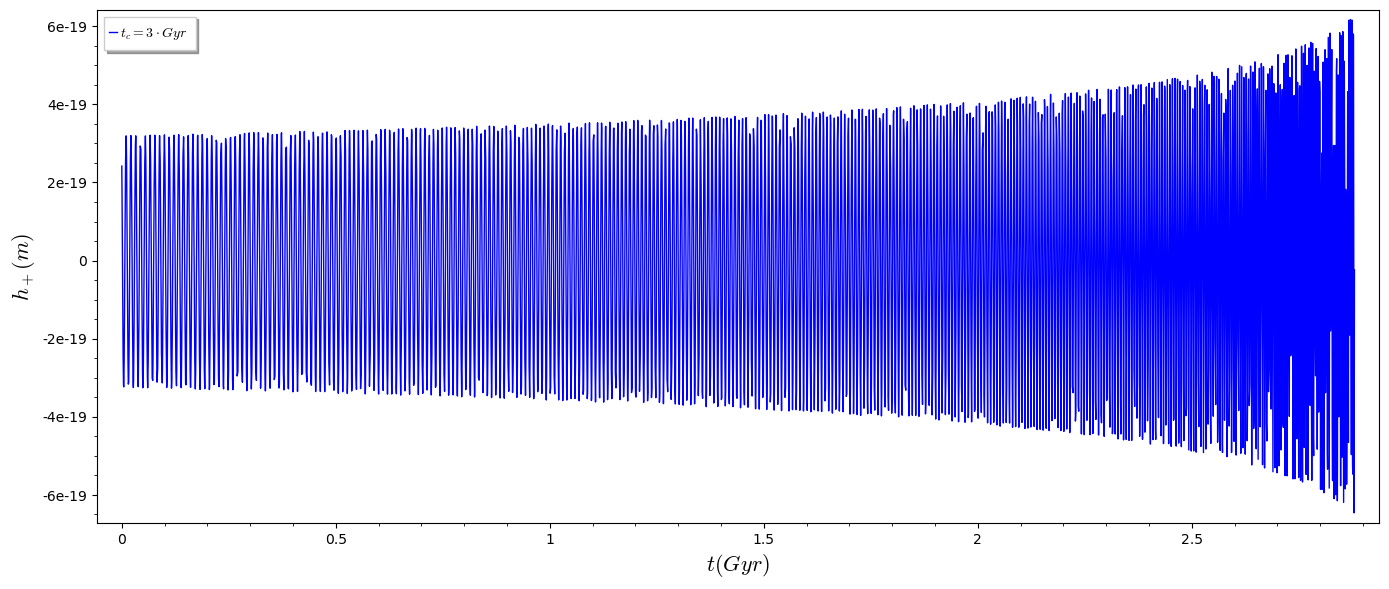

In [23]:
plot(h_plus_para.subs({iota : pi/2, tc : 3, Theta0 : 100}),(t,0,2.88),plot_points=3000,
                 frame = True, axes = False,axes_labels=[r'$t(Gyr)$', r'$h_+(m)$'], 
                 legend_label=r'$t_c= 3 \cdot Gyr$', figsize=[14,6])

In [24]:
g = [plot(h_plus_para.subs({iota : pi/2}, {tc : k, Theta0 : 100}),(t,0,(k-0.02)),plot_points=3000, 
          frame = True, axes = False, color=hue(k/10), alpha=.6, axes_labels=[r'$t(Gyr)$', r'$h_{+}(m)$'], 
          legend_label=r'$t_c={}$'.format(k.n(digits=2))) for k in srange(4, 17, 4)]

In [25]:
g_array = graphics_array([[g[0],g[1]],[g[2], g[3]]])

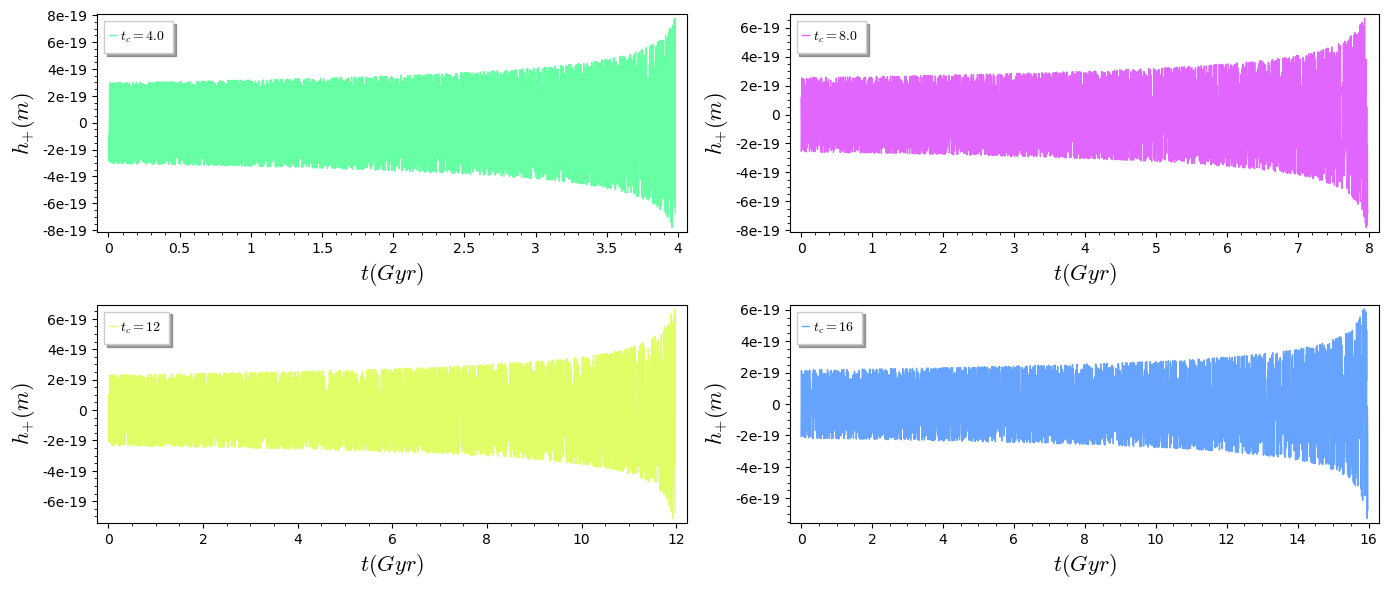

In [26]:
g_array.show(figsize = [14, 6])

In [27]:
#(g_array).save('h+_array_pos_pos_newt.pdf', gridlines=False, frame=True, axes=False, figsize=[14,6])

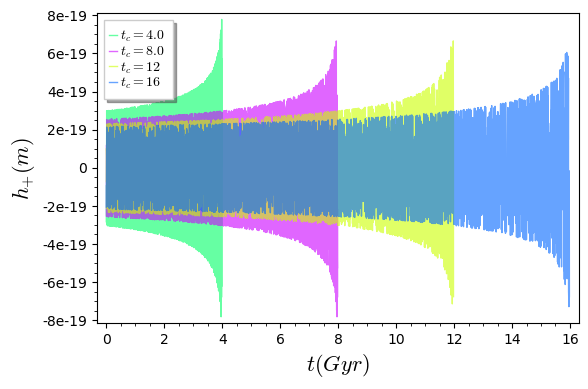

In [28]:
(g[0]+ g[1] + g[2] + g[3]).set_legend_options(loc = 'best')
sum(g)

In [29]:
#(sum(g)).save('h+_pos_pos_newt.pdf', gridlines=False, title='Expansão pós Newtoniana - $O(\\epsilon^6)$', frame=True, axes=False)

In [30]:
h_cross(t) = (2*G*mu/(c^2*r))*x*(H0_cross + x^(1/2)*H12_cross + x*H1_cross)
h_cross

t |--> 1/6*(9*dm*sqrt(x)*(3*sin(3*varphi) - sin(varphi))*cos(iota)*sin(iota)/M + 4*(8*(3*eta - 1)*cos(iota)*sin(iota)^2*sin(4*varphi) + ((12*cos(iota)^2 - 13)*eta - 4*cos(iota) + 17)*cos(iota)*sin(2*varphi))*x - 24*cos(iota)*sin(2*varphi))*G*mu*x/(c^2*r)

In [31]:
h_cross_para = h_cross.subs(varphi_f,x_f).subs(Theta_f, varphic == 0).subs(parametros_s).subs(parametros_m)
h_cross_para = h_cross_para.subs(parametros_2)

In [32]:
h_cross_para = h_cross_para.subs(parametros_1)

In [33]:
#h_cross_para.subs({iota : 2*pi, tc : 100})

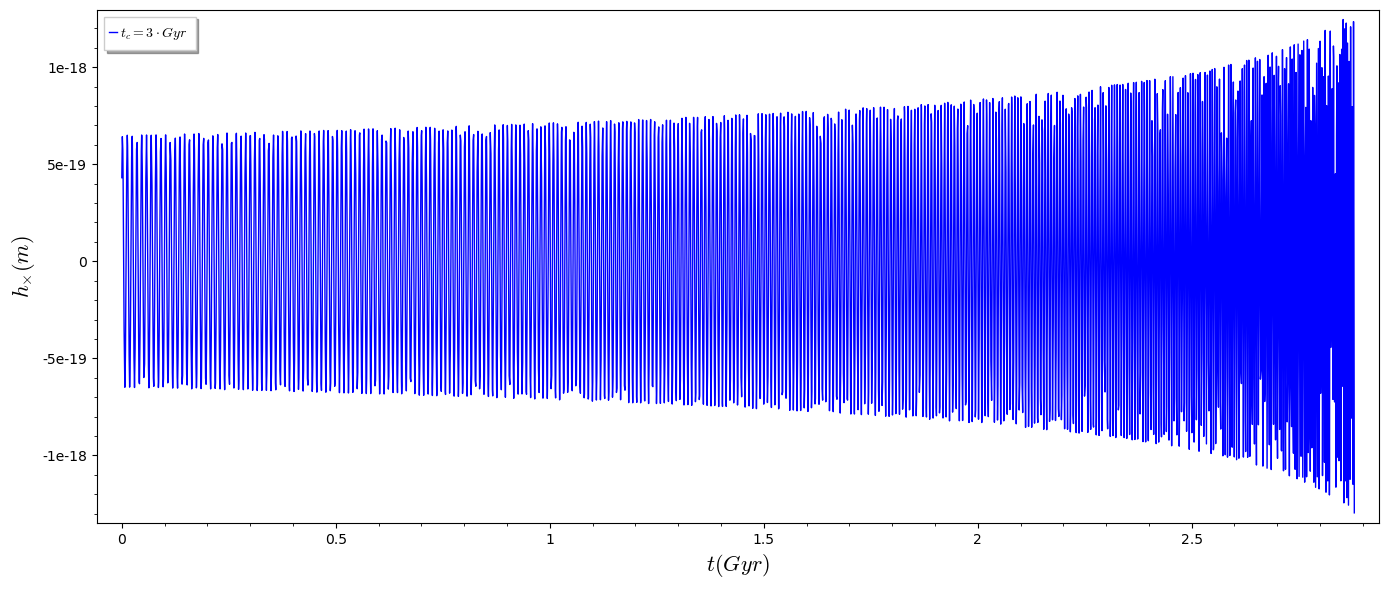

In [34]:
plot(h_cross_para.subs({iota: 0, tc:3, Theta0 : 100}),(t,0, 2.88),plot_points=3000, 
                frame = True, axes = False, axes_labels=[r'$t(Gyr)$', r'$h_{\times}(m)$'], 
                 legend_label=r'$t_c= 3 \cdot Gyr$', figsize=[14,6])

In [35]:
f = [plot(h_cross_para.subs({iota : 0}, {tc : k, Theta0 : 100}),(t,0,(k-0.02)), plot_points=3000, 
          frame = True, axes = False, color=hue(k/10),alpha=.6, axes_labels=[r'$t(Gyr)$', r'$h_{\times}(m)$'],
          legend_label=r'$t_c={}$'.format(k.n(digits=2))) for k in srange(4, 17, 4)]

In [36]:
f_array = graphics_array([[f[0],f[1]],[f[2], f[3]]])

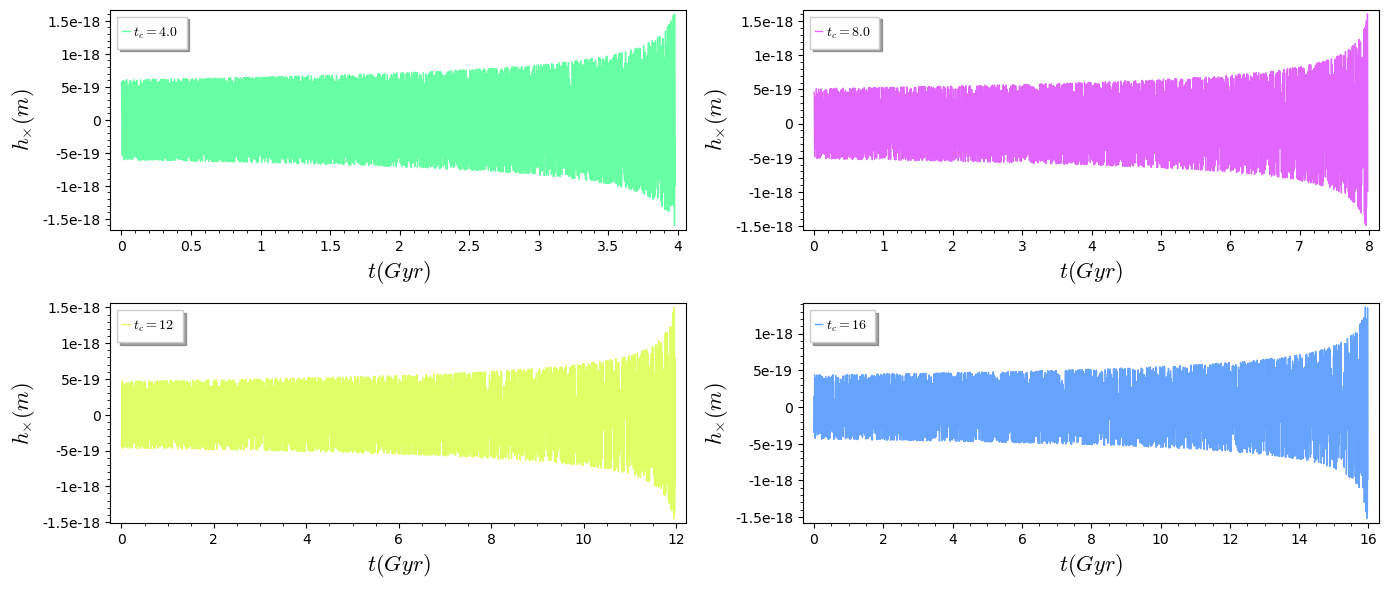

In [37]:
f_array.show(figsize = [14, 6])

In [38]:
#(f_array).save('hx_array_pos_pos_newt.pdf', gridlines=False, frame=True, axes=False, figsize=[14,6])

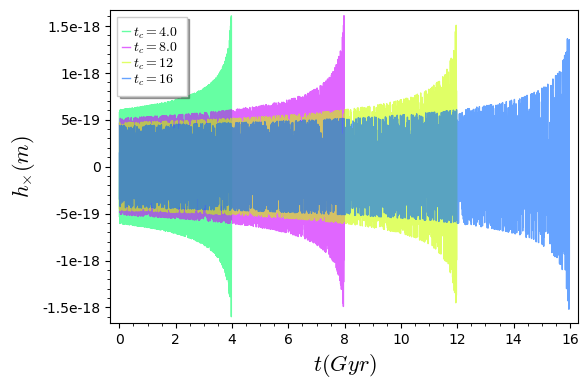

In [39]:
(f[0] + f[1] + f[2] + f[3]).set_legend_options(loc = 'best')
sum(f)

In [40]:
#(sum(f)).save('hx_pos_pos_newt.pdf', gridlines=False, title='Expansão pós Newtoniana - $O(\\epsilon^6)$', frame=True, axes=False)